In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

%matplotlib inline

In [51]:
limits = [-100, -75, -50, -25,25, 50, 75, 100]
data_to_plot = ("NPP", -80, 0)

In [52]:
palette = sns.color_palette("coolwarm_r", len(limits))
#palette = sns.color_palette("RdBu", len(limits))

In [53]:
palette.as_hex()
pal_hex = ['#973505','#E87615','#FFCE7E','#EAF6BC','#A1CD49','#6BBF58','#4E84B9','#3654A4']

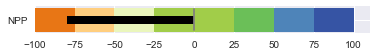

In [54]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels([data_to_plot[0]])

prev_limit = -100
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=15, color=pal_hex[idx])
    prev_limit = lim
    
# Draw the value we're measuring
ax.barh([1], data_to_plot[1], color='black', height=5)
ax.axvline(data_to_plot[2], color="gray", ymin=0.10, ymax=0.9)

In [7]:
([data_to_plot[0]])

['Example 1']

In [55]:
import pandas as pd

In [121]:
csv_in = r'D:\jupyter notebooks\3348.10 WAP Awash - Ethiopie\CSV-files\select_stats\select_stats_L2_AET_D.csv'
df = pd.read_csv(csv_in)
#df.drop_duplicates(['doy','wereda'], inplace=True)

In [122]:
df.head()

,count,max,mean,min,std,sum,doy,wereda,parameter
0,9459275.500,74.375,7.909482,0.0,8.985561,7.481798e+07,1,NU_0,L2_AET_D
1,9459273.250,72.375,8.054100,0.0,8.647450,7.618594e+07,11,NU_0,L2_AET_D
2,9459275.375,75.375,8.100952,0.0,8.955202,7.662913e+07,21,NU_0,L2_AET_D
3,9459272.625,78.250,6.981414,0.0,8.881124,6.603909e+07,32,NU_0,L2_AET_D
4,9459272.750,83.750,7.837757,0.0,9.371059,7.413948e+07,42,NU_0,L2_AET_D


In [127]:
df_wereda = df[(df.wereda == 'NU_1')]
df_wereda_doy = df_wereda[(df_wereda.doy == 42)] 
df_wereda_doy.head()

,count,max,mean,min,std,sum,doy,wereda,parameter
69,1642412.75,82.25,6.788928,0.0,11.41984,11150222.75,42,NU_1,L2_AET_D


In [98]:
csv_in_2016 = r'D:\jupyter notebooks\3348.10 WAP Awash - Ethiopie\CSV-files\2016\Y2016_L2_AET_D.csv'

In [99]:
df2 = pd.read_csv(csv_in_2016)

In [100]:
df2.loc[:,'date'] = pd.to_datetime(df2['date'])
# compute year and day of year column
df2.loc[:,'year'] = df2['date'].dt.year
df2.loc[:,'doy'] = df2['date'].dt.dayofyear  

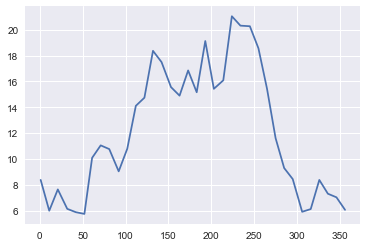

In [131]:
#df2[(df2.wereda == 'NU_1')]['mean']
plt.plot(df2[(df2.wereda == 'NU_1')]['doy'], df2[(df2.wereda == 'NU_1')]['mean'])

In [128]:
df_wereda.head()

,count,max,mean,min,std,sum,doy,wereda,parameter
65,1642412.500,68.125,6.756669,0.000,10.156660,1.109724e+07,1,NU_1,L2_AET_D
66,1642412.625,68.375,6.666969,0.125,9.906111,1.094991e+07,11,NU_1,L2_AET_D
67,1642412.375,71.875,6.670000,0.125,10.138106,1.095489e+07,21,NU_1,L2_AET_D
68,1642412.625,76.875,5.841092,0.000,10.525879,9.593482e+06,32,NU_1,L2_AET_D
69,1642412.750,82.250,6.788928,0.000,11.419840,1.115022e+07,42,NU_1,L2_AET_D


c:\python35\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


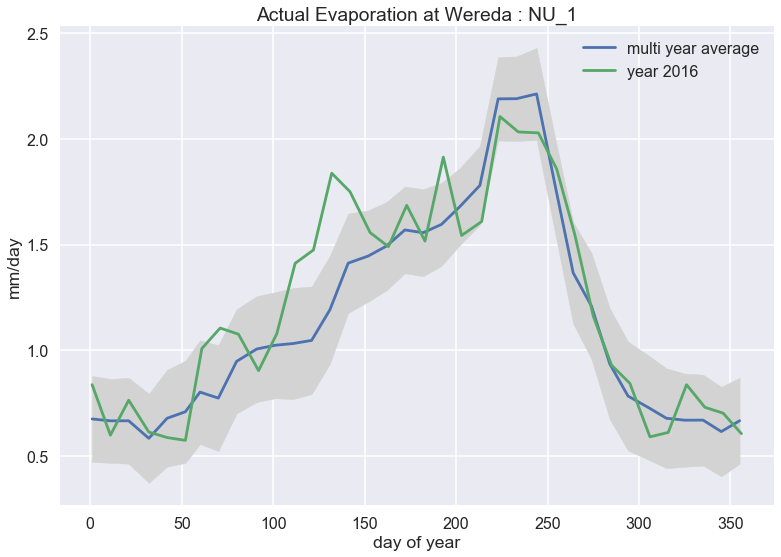

In [150]:
sns.set_context("poster")
df_wereda.drop_duplicates('doy', inplace=True)
plt.plot(df_wereda['doy'], df_wereda['mean']*0.1, label = 'multi year average')
plt.fill_between(x = df_wereda['doy'], 
                 y1 = df_wereda['mean']*0.1+df_wereda['std']*0.02, 
                 y2 = df_wereda['mean']*0.1-df_wereda['std']*0.02,
                 color='lightgray')
# plt.plot(df_wereda['doy'], df_wereda['mean']*0.1+df_wereda['std']*0.01, label = 'multi year +1std')
# plt.plot(df_wereda['doy'], df_wereda['mean']*0.1-df_wereda['std']*0.01, label = 'multi year -1std')
plt.plot(df2[(df2.wereda == 'NU_1')]['doy'], df2[(df2.wereda == 'NU_1')]['mean']*0.1, label='year 2016')
plt.ylabel('mm/day')
plt.xlabel('day of year')
plt.title('Actual Evaporation at Wereda : NU_1')
plt.legend()
plt.savefig(r'D:\Projects\Pr\3348.10\Presentatie//wereda_nu1_stat.png', dpi=100)
plt.show()


In [126]:
df[(df.wereda == 'NU_1')]

,count,max,mean,min,std,sum,doy,wereda,parameter
65,1642412.500,68.125,6.756669,0.000,10.156660,1.109724e+07,1,NU_1,L2_AET_D
66,1642412.625,68.375,6.666969,0.125,9.906111,1.094991e+07,11,NU_1,L2_AET_D
67,1642412.375,71.875,6.670000,0.125,10.138106,1.095489e+07,21,NU_1,L2_AET_D
68,1642412.625,76.875,5.841092,0.000,10.525879,9.593482e+06,32,NU_1,L2_AET_D
69,1642412.750,82.250,6.788928,0.000,11.419840,1.115022e+07,42,NU_1,L2_AET_D
70,1642412.500,86.875,7.097097,0.000,12.078487,1.165636e+07,52,NU_1,L2_AET_D
71,1642412.500,88.875,8.025917,0.125,12.258477,1.318187e+07,60,NU_1,L2_AET_D
72,1642412.625,89.625,7.741335,0.000,12.486482,1.271447e+07,70,NU_1,L2_AET_D
73,1642412.750,86.375,9.477875,0.000,12.302438,1.556658e+07,80,NU_1,L2_AET_D
74,1642412.750,88.875,10.061080,0.000,12.502762,1.652445e+07,91,NU_1,L2_AET_D


In [102]:
df2[(df2.doy == 42) & (df2.wereda == 'NU_1')]

,Unnamed: 0,count,max,mean,min,std,sum,date,wereda,year,doy
425,1,1642413,81.0,5.877894,0.0,10.195508,9653930.0,2016-02-11,NU_1,2016,42


In [103]:
df[(df.doy == 42) & (df.wereda == 'NU_1')]

,count,max,mean,min,std,sum,doy,wereda,parameter
69,1642412.75,82.25,6.788928,0.0,11.41984,11150222.75,42,NU_1,L2_AET_D


In [94]:
limits = [0, 56.017904, (56.017904*2), (56.017904*3)]
data_to_plot = ("NDVI", 26.493968, 19.567967)

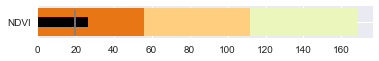

In [95]:
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_yticks([1])
ax.set_yticklabels([data_to_plot[0]])

prev_limit = 0
for idx, lim in enumerate(limits):
    ax.barh([1], lim-prev_limit, left=prev_limit, height=15, color=pal_hex[idx])
    prev_limit = lim
    
# Draw the value we're measuring
ax.barh([1], data_to_plot[1], color='black', height=5)
ax.axvline(data_to_plot[2], color="gray", ymin=0.10, ymax=0.9)